In [11]:
from langgraph.graph import StateGraph,END,START
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import os


In [3]:
load_dotenv()


True

In [6]:
llm=ChatOpenAI(
    model='deepseek/deepseek-chat-v3-0324:free',
    api_key=os.environ['OPENROUTER_API_KEY'],
    base_url='https://openrouter.ai/api/v1',
    temperature=0.7
)


In [9]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [13]:
def generate_joke(state:JokeState):
    prompt=f'generate a joke on the topic {state['topic']}'
    response=llm.invoke(prompt).content

    return {'joke':response}


In [14]:
def generate_explanation(state:JokeState):
    prompt=f'Write the explanation on the given joke - {state["joke"]}'
    response=llm.invoke(prompt).content

    return {'explanation':response}

In [16]:
graph=StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)

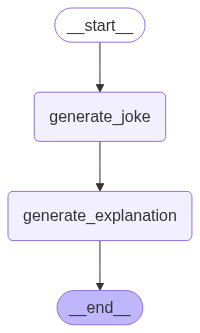

In [17]:
workflow

In [19]:
config1={'configurable':{'thread_id':'1'}}

workflow.invoke({'topic':'pizza'},config=config1)

{'topic': 'pizza',
 'joke': 'Here\'s a cheesy one for you:  \n\n**Why did the pizza maker go to therapy?**  \nBecause he couldn’t stop *kneading* validation! 🍕😄  \n\n(Or if you prefer a punny one-liner: **"I told a pizza joke, but it was too *crusty*—no one could handle the *cheese*!"**)  \n\nLet me know if you want a different style!',
 'explanation': '### Explanation of the Joke:\n\n1. **"Why did the pizza maker go to therapy? Because he couldn’t stop *kneading* validation!"**  \n   - **Wordplay**: The pun hinges on the double meaning of "kneading."  \n     - In pizza making, *kneading* refers to the process of working dough to develop gluten (a crucial step in making pizza crust).  \n     - In a psychological context, *needing* validation means seeking approval or reassurance from others.  \n   - **Humor**: The joke combines the literal action of a pizza maker (kneading dough) with the metaphorical idea of emotional neediness, creating a playful twist. The therapist is humorously "t

In [20]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Here\'s a cheesy one for you:  \n\n**Why did the pizza maker go to therapy?**  \nBecause he couldn’t stop *kneading* validation! 🍕😄  \n\n(Or if you prefer a punny one-liner: **"I told a pizza joke, but it was too *crusty*—no one could handle the *cheese*!"**)  \n\nLet me know if you want a different style!', 'explanation': '### Explanation of the Joke:\n\n1. **"Why did the pizza maker go to therapy? Because he couldn’t stop *kneading* validation!"**  \n   - **Wordplay**: The pun hinges on the double meaning of "kneading."  \n     - In pizza making, *kneading* refers to the process of working dough to develop gluten (a crucial step in making pizza crust).  \n     - In a psychological context, *needing* validation means seeking approval or reassurance from others.  \n   - **Humor**: The joke combines the literal action of a pizza maker (kneading dough) with the metaphorical idea of emotional neediness, creating a playful twist. The therapi

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Here\'s a cheesy one for you:  \n\n**Why did the pizza maker go to therapy?**  \nBecause he couldn’t stop *kneading* validation! 🍕😄  \n\n(Or if you prefer a punny one-liner: **"I told a pizza joke, but it was too *crusty*—no one could handle the *cheese*!"**)  \n\nLet me know if you want a different style!', 'explanation': '### Explanation of the Joke:\n\n1. **"Why did the pizza maker go to therapy? Because he couldn’t stop *kneading* validation!"**  \n   - **Wordplay**: The pun hinges on the double meaning of "kneading."  \n     - In pizza making, *kneading* refers to the process of working dough to develop gluten (a crucial step in making pizza crust).  \n     - In a psychological context, *needing* validation means seeking approval or reassurance from others.  \n   - **Humor**: The joke combines the literal action of a pizza maker (kneading dough) with the metaphorical idea of emotional neediness, creating a playful twist. The therap

In [22]:
config2={'configurable':{'thread_id':'2'}}

workflow.invoke({'topic':'pasta'},config=config2)

{'topic': 'pasta',
 'joke': "Sure! Here's a cheesy pasta joke for you:  \n\n**Why did the spaghetti break up with the fettuccine?**  \nBecause it couldn't handle the *twisted* relationship! 🍝😂  \n\nLet me know if you'd like another one—I've got *plenty* of noodle puns!",
 'explanation': 'Here’s the explanation of the joke:\n\n### **Joke Breakdown:**\n1. **Setup**: The joke personifies two types of pasta—spaghetti and fettuccine—as if they were in a romantic relationship.  \n   - Spaghetti is long and thin, often tangled or "twisted."  \n   - Fettuccine is flat and ribbon-like, less prone to tangling.  \n\n2. **Punchline**: "Because it couldn\'t handle the *twisted* relationship!"  \n   - **Literal Meaning**: Spaghetti is physically twisted in shape, making it hard to "handle" (literally, it gets tangled).  \n   - **Figurative Meaning**: The word "twisted" also implies a dysfunctional or complicated romantic relationship. So, the spaghetti "broke up" with fettuccine because their relati

In [24]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Sure! Here's a cheesy pasta joke for you:  \n\n**Why did the spaghetti break up with the fettuccine?**  \nBecause it couldn't handle the *twisted* relationship! 🍝😂  \n\nLet me know if you'd like another one—I've got *plenty* of noodle puns!", 'explanation': 'Here’s the explanation of the joke:\n\n### **Joke Breakdown:**\n1. **Setup**: The joke personifies two types of pasta—spaghetti and fettuccine—as if they were in a romantic relationship.  \n   - Spaghetti is long and thin, often tangled or "twisted."  \n   - Fettuccine is flat and ribbon-like, less prone to tangling.  \n\n2. **Punchline**: "Because it couldn\'t handle the *twisted* relationship!"  \n   - **Literal Meaning**: Spaghetti is physically twisted in shape, making it hard to "handle" (literally, it gets tangled).  \n   - **Figurative Meaning**: The word "twisted" also implies a dysfunctional or complicated romantic relationship. So, the spaghetti "broke up" with fettuccine 

# Time Travel

In [25]:
workflow.get_state({'configurable':{'thread_id':'2',"checkpoint_id":'1f06dfed-ac06-6b58-8000-8d4bc146b6e7'}})



StateSnapshot(values={'topic': 'pasta'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f06dfed-ac06-6b58-8000-8d4bc146b6e7'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}, 'thread_id': '2'}, created_at='2025-07-31T11:09:40.764962+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06dfed-ac02-6d5c-bfff-96c12d968466'}}, tasks=(PregelTask(id='d1b51e11-51da-be46-0c24-6940bd5b3f87', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': "Sure! Here's a cheesy pasta joke for you:  \n\n**Why did the spaghetti break up with the fettuccine?**  \nBecause it couldn't handle the *twisted* relationship! 🍝😂  \n\nLet me know if you'd like another one—I've got *plenty* of noodle puns!"}),), interrupts=())

In [26]:
workflow.invoke(None,{'configurable':{'thread_id':'2',"checkpoint_id":'1f06dfed-ac06-6b58-8000-8d4bc146b6e7'}})

{'topic': 'pasta',
 'joke': 'Sure! Here\'s a pasta joke for you:  \n\n**Why did the spaghetti break up with the linguine?**  \nBecause it said, "You\'re too saucy, and I need some *space*!"  \n\nHope that gives you a chuckle! Let me know if you\'d like another one. 🍝😄',
 'explanation': 'Certainly! Here\'s a breakdown of why this pasta-themed joke is humorous:\n\n### **Wordplay & Double Meaning:**\n1. **"Saucy"** – This word has two meanings:\n   - Literally: Pasta is often served with sauce, so linguine (a type of pasta) could be described as "saucy."\n   - Figuratively: In English, "saucy" can mean someone is cheeky, flirtatious, or overly bold, implying the linguine was being a bit too much to handle.\n\n2. **"Need some space"** – This also has a double meaning:\n   - Literal: Spaghetti and linguine are long, thin noodles that can get tangled if they don\'t have enough "space" in the pot or plate.\n   - Figurative: In relationships, "needing space" means wanting distance from someone

# Update State

In [30]:
workflow.update_state(
    {
        'configurable': {
            'thread_id': '2',
            'checkpoint_id': '1f06dfed-ac06-6b58-8000-8d4bc146b6e7',
            'checkpoint_ns': ''  # ✅ Add this
        }
    },
    {'topic': 'samosa'}
)


{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f06e019-58cb-6dcb-8001-67448a459265'}}

In [31]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06e019-58cb-6dcb-8001-67448a459265'}}, metadata={'source': 'update', 'step': 1, 'parents': {}, 'thread_id': '2'}, created_at='2025-07-31T11:29:13.153684+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f06dfed-ac06-6b58-8000-8d4bc146b6e7'}}, tasks=(PregelTask(id='9ca0a8b1-43b7-a7f9-f524-21516b061771', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Sure! Here\'s a pasta joke for you:  \n\n**Why did the spaghetti break up with the linguine?**  \nBecause it said, "You\'re too saucy, and I need some *space*!"  \n\nHope that gives you a chuckle! Let me know if you\'d like another one. 🍝😄', 'explanation': 'Certainly! Here\'s a breakdown of why this pasta-theme

In [32]:
workflow.invoke(None,{'configurable':{'thread_id':'2',"checkpoint_id":'1f06e019-58cb-6dcb-8001-67448a459265'}})

{'topic': 'samosa',
 'joke': 'Sure! Here\'s a samosa joke for you:  \n\n**Why did the samosa go to the gym?**  \n*Because it wanted to avoid becoming a* **"flaky"** *snack!* 🏋️\u200d♂️😆  \n\n(Get it? Samosas are flaky, and the joke plays on the pun of being flaky in texture vs. being unreliable!)  \n\nHope that brings a smile! Let me know if you want another one. 😊',
 'explanation': 'Here\'s a breakdown of why this **samosa gym joke** is funny:\n\n1. **Double Meaning of "Flaky":**  \n   - *Literal:* Samosas have a crispy, flaky pastry crust.  \n   - *Figurative:* Calling someone "flaky" means they’re unreliable or inconsistent (e.g., canceling plans last minute).  \n\n2. **The Punchline:**  \n   The samosa humorously "works out" to avoid becoming literally flaky (losing its crispness) while also "improving itself" to not be figuratively flaky (unreliable). It’s a playful twist on self-improvement clichés (like going to the gym to "better yourself").  \n\n3. **Visual Humor:**  \n   Imag